# Классификация - логистическая регрессия

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# data -- 30 атрибутов
# target -- 2 атрибута Malignant & Benign

cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names

print(cancer_df.columns)
cancer_df.head()


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Class: 0 - злокачетсвенные
#        1 - доброкачественные

target_df = pd.DataFrame(cancer.target)
target_df.head(100)
target_df.columns

RangeIndex(start=0, stop=1, step=1)

C:\Users\Alexander\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


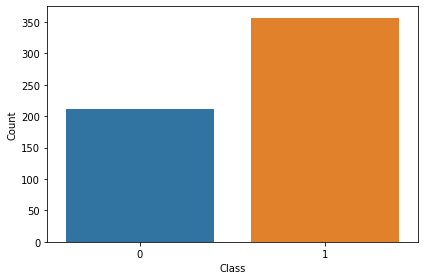

In [6]:
# Сколько "0" и "1". 
# Дисбаланс не велик.
plt.figure(figsize=(6,4))
sns.countplot(cancer.target)

plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()

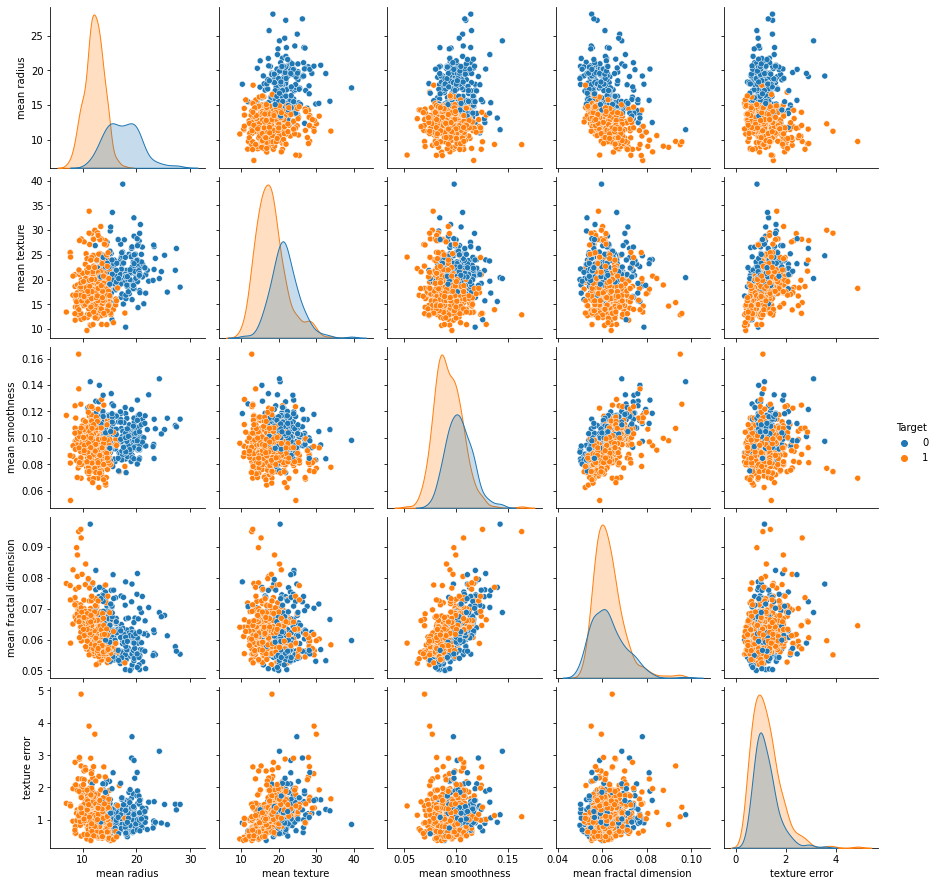

In [7]:
# скетерплоты для некторых признаков с разделением "рак"/"не рак"
cancer_with_target_df = cancer_df.copy()
cancer_with_target_df['Target']= cancer.target

some_list_of_props = ['mean radius', 'mean texture','mean smoothness', 'mean fractal dimension', 'texture error', 'Target']

sns.pairplot(cancer_with_target_df[some_list_of_props], hue='Target')

<AxesSubplot:xlabel='mean radius', ylabel='mean fractal dimension'>

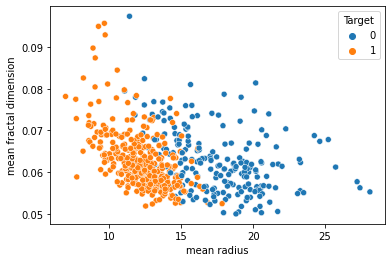

In [8]:
# если нужен отдельный скетерплот

prop1_name, prop2_name = 'mean radius', 'mean fractal dimension'

sns.scatterplot(data =cancer_with_target_df[[prop1_name, prop2_name, 'Target']],
                x=cancer_with_target_df[prop1_name], 
                y=cancer_with_target_df[prop2_name],
                hue=cancer_with_target_df['Target'])

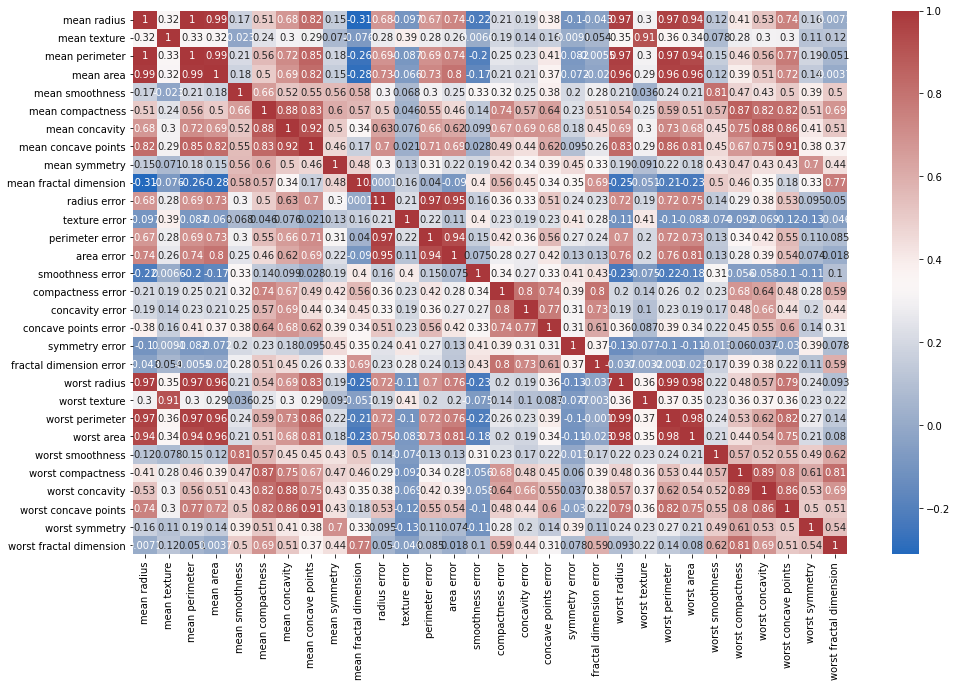

In [9]:
# корреляции признаков

# print("\nCorrelation matrix:\n", cancer_df.corr())
plt.figure(figsize=(16,10))
sns.heatmap(cancer_df.corr(), cmap ="vlag", annot=True)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

logi_regres = LogisticRegression(max_iter = 10000 )
#   logi_regres.max_iter = 10000        --  100 by default

model = logi_regres.fit(cancer.data, cancer.target)

print(model.coef_)

[[ 0.96481269  0.17514584 -0.27171144  0.02312744 -0.19287495 -0.20195409
  -0.54915592 -0.31966916 -0.28145133 -0.02674066 -0.08094864  1.19722729
   0.10501865 -0.10672897 -0.02873743  0.09664703 -0.01676582 -0.04122551
  -0.03145923  0.01884335  0.1211101  -0.43039525 -0.10655894 -0.0136482
  -0.38911285 -0.61804147 -1.44361991 -0.65340607 -0.74479283 -0.08489819]]


In [11]:
model.intercept_

array([28.46559185])

In [12]:
# предсказания "рак"/"не рак"
predictions = model.predict(cancer.data)
print(predictions[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [13]:
# предсказания: вероятности для"рак" и вероятности для "не рак"
predictions = model.predict_proba(cancer.data)
print(predictions[:5])

[[1.00000000e+00 3.27911840e-14]
 [9.99995890e-01 4.11046848e-06]
 [9.99999421e-01 5.79254958e-07]
 [6.87764073e-01 3.12235927e-01]
 [9.99735997e-01 2.64003003e-04]]


In [14]:
# сведено в одну таблицу
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ["Pribability for Class 0","Pribability for Class 1"]
predictions_df["Target"] = cancer.target
pd.options.display.float_format = '{:,.4f}'.format
predictions_df.head(100)

,Pribability for Class 0,Pribability for Class 1,Target
0,1.0000,0.0000,0
1,1.0000,0.0000,0
2,1.0000,0.0000,0
3,0.6878,0.3122,0
4,0.9997,0.0003,0
...,...,...,...
95,1.0000,0.0000,0
96,0.0002,0.9998,1
97,0.0001,0.9999,1
98,0.0004,0.9996,1


In [15]:
# посмотрим какие y = w0 + w1*x1 + w2*x2 + ... получилсь для линейной регрессии
import operator

predictions = []
for i in range(0, cancer.target.size):

    prediction = sum(map(
        lambda pair: operator.mul(*pair),
        zip(model.coef_[0], cancer.data[i])
    )) + model.intercept_
    predictions.append(prediction)
y = pd.DataFrame(predictions, columns=['y'])
y['Target'] = cancer.target
y['Pribability for Class 0'] = predictions_df['Pribability for Class 0']
y.head(-10)

# Prediction y = w0 + w1*x1 + w2*x2 + ...
# where w0 = model.intercept_, [w1,w2,...] = model.coef_
#       [x1,x2,...] = cancer.data[i]
# If y < 0 then we predict 0
# If y > 0 then we predict 1

,y,Target,Pribability for Class 0
0,-31.0486,0,1.0000
1,-12.4020,0,1.0000
2,-14.3615,0,1.0000
3,-0.7897,0,0.6878
4,-8.2393,0,0.9997
...,...,...,...
554,3.2720,1,0.0365
555,7.2819,1,0.0007
556,11.2328,1,0.0000
557,7.9295,1,0.0004


In [16]:
# Средняя точность предсказаний на исходном датасете

accuracy = model.score(cancer.data, cancer.target)
print(accuracy)

0.9578207381370826


# Метрики качества в задачах классификации

**Confusion matrix** (**Матрица ошибок**)

$\hat{y}=0, y=0$ – TN

$\hat{y}=0, y=1$ – FN – ошибка II-го рода

$\hat{y}=1, y=0$ – FP – ошибка I-го рода

$\hat{y}=1, y=1$ – TP

где $\hat{y}$ – предсказание, $y$ – корректный ответ.

confusion_matrix:
 [[197  15]
 [  9 348]]
confusion_matrix normalized:
 [[0.92924528 0.07075472]
 [0.02521008 0.97478992]]
tn, fp, fn, tp: 197 15 9 348


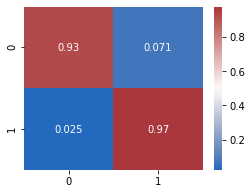

In [17]:
from sklearn import metrics

predictions = model.predict(cancer.data)

cm  = metrics.confusion_matrix(cancer.target, predictions)
cmn = metrics.confusion_matrix(cancer.target, predictions, normalize='true')
print('confusion_matrix:\n', cm)
print('confusion_matrix normalized:\n', cmn)

tn, fp, fn, tp = metrics.confusion_matrix(cancer.target, predictions).ravel()
print('tn, fp, fn, tp:', tn, fp, fn, tp)

plt.figure(figsize=(4,3))
sns.heatmap(cmn, cmap ="vlag", annot=True)
plt.show()

## Accuracy

**Accuracy** (**Правильность**) — доля правильных ответов алгоритма.

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

Accuracy она не учитывает дисбаланс классов. Например, в задаче диагностики редких заболеваний классификатор, предсказывающий всем пациентам отсутствие болезни будет иметь достаточно высокую accuracy просто потому, что больных людей в выборке намного меньше.

Accuracy также не учитывает цену ошибки на объектах разных классов. Для примера снова можно привести задачу медицинской диагностики: если ошибочный положительный диагноз для здорового больного обернётся лишь ещё одним обследованием, то ошибочно отрицательный вердикт может повлечь роковые последствия.

Сопряженная ей метрика – **доля ошибочных классификаций** (**error rate**): $Error\,rate = 1 -Accuracy$


In [18]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# or
tn, fp, fn, tp = metrics.confusion_matrix(cancer.target, predictions).ravel()
print('tn, fp, fn, tp:', tn, fp, fn, tp, '\n')

predictions = model.predict(cancer.data)

acc_manual  = (TP+TN) / (TP+FP+TN+FN)
acc_model   = model.score(cancer.data, cancer.target)
acc_metrics = metrics.accuracy_score(cancer.target, predictions)

print('accuracy manual:       {:.10f}'.format(acc_manual))
print('accuracy from model:   {:.10f}'.format(acc_model))
print('accuracy from metrics: {:.10f}'.format(acc_metrics))

tn, fp, fn, tp: 197 15 9 348 

accuracy manual:       0.9578207381
accuracy from model:   0.9578207381
accuracy from metrics: 0.9578207381


## Precision, Recall, F-score

Accuracy - это метрика, которая характеризует качество модели, агрегированное по всем классам. Это полезно, когда классы для нас имеют одинаковое значение. В случае, если это не так, accuracy может быть обманчивой.

**Precision** (**точность**) – показывает количество истинно положительных исходов из всего набора положительных меток:

$$\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}.$$

Отвечает на вопрос: "Сколько выбранных объектов релевантны?". Важность этой метрики определяется тем, насколько высока для рассматриваемой задачи «цена» ложно положительного результата.

**Recall** или **true positive rate** (**полнота**, **чувствительность**) – определяет количество истинно положительных среди всех меток класса, которые были определены как «положительный» 

$$\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}.$$

Отвечает на вопрос: "Сколько релевантных объектов выбраны?". Необходимо уделить особое внимание этой оценке, когда в поставленной задаче ошибка нераспознания положительного класса высока, например, при выставлении диагноза какой-либо смертельной болезни.

Существует способ объединить precision и recall в агрегированный критерий качества через среднее гармоническое – **F1-мера**.

$$ F_1 = \frac{2\cdot \text{Precision}\cdot \text{Recall}}{\text{Precision}+\text{Recall}}. $$

Более обще – $F_\beta\text{-score}$, когда более приоритетной метрике приписывается дополнительный вес, больший 1:
$$ F_\beta = (1+\beta^2)\frac{\text{Precision}\cdot \text{Recall}}{\beta^2\text{Precision}+\text{Recall}}. $$

In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(cancer.target, predictions).ravel()

# precision
prec_manual = tp / (tp+fp)
prec_metrics = metrics.precision_score(cancer.target, predictions)

print('Precision manual:       {:.10f}'.format(prec_manual))
print('Precision from metrics: {:.10f}'.format(prec_metrics))

# recall
rec_manual = tp / (tp+fn)
rec_metrics = metrics.recall_score(cancer.target, predictions)

print('\n')
print('Recall manual:       {:.10f}'.format(rec_manual))
print('Recall from metrics: {:.10f}'.format(rec_metrics))

# F-score
f1 = metrics.f1_score(cancer.target, predictions)
f_beta1  = metrics.fbeta_score(cancer.target, predictions, beta=1)
f_beta05 = metrics.fbeta_score(cancer.target, predictions, beta=0.5)
f_beta2  = metrics.fbeta_score(cancer.target, predictions, beta=2)
print('\nF1-score:        {:.10f}'.format(f1))
print('nF_beta1-score:  {:.10f}'.format(f_beta1))
print('nF_beta05-score: {:.10f}'.format(f_beta05))
print('nF_beta2-score:  {:.10f}'.format(f_beta2))


Precision manual:       0.9586776860
Precision from metrics: 0.9586776860


Recall manual:       0.9747899160
Recall from metrics: 0.9747899160

F1-score:        0.9666666667
nF_beta1-score:  0.9666666667
nF_beta05-score: 0.9618573798
nF_beta2-score:  0.9715242881


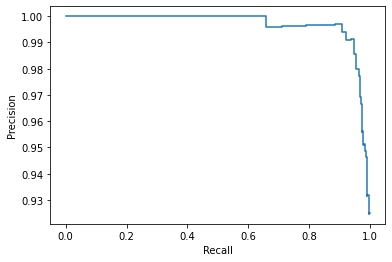

In [20]:
# Precision-Recall curve
# Compute precision-recall pairs for different probability thresholds.

predictions_proba = model.predict_proba(cancer.data)
# выбираем вероятности для "1"
predict_proba_1 = predictions_proba[:,1]

precision, recall, thresholds = metrics.precision_recall_curve(cancer.target, predict_proba_1)
# Returns
# - precision
# Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.
# - recall
# Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.
#  - thresholds
# Increasing thresholds on the decision function used to compute precision and recall
disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## ROC AUC
**ROC-кривая** (receiver operating characteristic, кривая ошибок) — график, показывающий зависимость верно классифицируемых объектов положительного класса от ложно положительно классифицируемых объектов негативного класса. Иными словами, соотношение True Positive Rate (Recall) и False Positive Rate.

Количественная интерпретация ROC даёт показатель **AUC** (Area Under Curve, площадь под кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот. Идеальное значение графика находится в верхней левой точке (TPR = 1, a FPR = 0).

AUC обладает так же и статистическим смыслом: она показывает вероятность того, что случайно выбранный экземпляр негативного класса будет иметь меньше вероятность быть распознанным как позитивный класс, чем случайно выбранный позитивный класс.

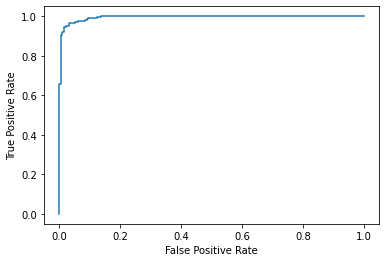

In [21]:
# ROC curve(y_true, y_score, *[, pos_label, ...]) 
# Compute Receiver operating characteristic (ROC). 

predictions_proba = model.predict_proba(cancer.data)
# выбираем вероятности для "1"
predict_proba_1 = predictions_proba[:,1]

fpr, tpr, thresholds = metrics.roc_curve(cancer.target, predict_proba_1)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# fpr - Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
# tpr  - Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

## ROC AUC score

In [22]:
predictions       = model.predict(cancer.data)
predictions_proba = model.predict_proba(cancer.data)
# выбираем вероятности для "1"
predict_proba_1 = predictions_proba[:,1]

roc_auc_predi = metrics.roc_auc_score(cancer.target, predictions)
roc_auc_proba = metrics.roc_auc_score(cancer.target, predict_proba_1)

print('roc_auc_predicted:       {:.10f}'.format(roc_auc_predi))
print('roc_auc_probabilities:   {:.10f}'.format(roc_auc_proba))

roc_auc_predicted:       0.9520175995
roc_auc_probabilities:   0.9946884414


## Log loss



In [23]:
predictions_proba = model.predict_proba(cancer.data)
log_loss = metrics.log_loss(cancer.target, predictions_proba)
print('log_loss:     {:.10f}'.format(log_loss))

log_loss:     0.0885103388


In [24]:
# Метрики из модуля metrics

predictions = model.predict(cancer.data)

from sklearn import metrics


print("Accuracy: {:.2f}".format(metrics.accuracy_score(cancer.target, predictions)))
print("ROC AUC:  {:.2f}".format(metrics.roc_auc_score (cancer.target, predictions))) # why predicted values, not probabilities?
print("F1:       {:.2f}".format(metrics.f1_score      (cancer.target, predictions)))


Accuracy: 0.96
ROC AUC:  0.95
F1:       0.97


In [25]:
# classification_report()

print( 
    metrics.classification_report(cancer.target, predictions, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.93      0.94       212
      benign       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

